### Below used for debugging individual circuit runs


In [13]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import iSwapGate, CXGate
from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakeQuitoV2
from qiskit.transpiler.coupling import CouplingMap
from qiskit.extensions import UnitaryGate
from weylchamber import canonical_gate
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from transpile_benchy.metrics.gate_counts import DepthMetric, TotalMetric, TotalSwaps
from transpile_benchy.metrics.timer import TimeMetric
from mirror_gates.fast_unitary import FastConsolidateBlocks
from qiskit.transpiler.passes import Collect2qBlocks, Unroll3qOrMore, ConsolidateBlocks
from qiskit.transpiler import PassManager
import numpy as np
from mirror_gates.logging import transpile_benchy_logger

In [14]:
N = 2
# coupling_map = FakeQuitoV2().target.build_coupling_map()
# coupling_map = CouplingMap.from_grid(4,4)
coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)
# coupling_map.draw()

In [15]:
# 2Q Gate Costs:
# CX: {CX:1, sqiswap:2}
# qc = TwoLocal(
#     num_qubits=N,
#     rotation_blocks="ry",
#     entanglement_blocks=CXGate(),
#     entanglement="full",
#     reps=1,
# )

# # CPHASE(pi/2): {CX:2, sqiswap:2}
# qc = TwoLocal(num_qubits=4,  rotation_blocks='ry', entanglement_blocks = CXGate().power(1/2), entanglement='full', reps=2)

# # iswap: {CX:2, sqiswap:2}
# qc = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks = iSwapGate(), entanglement='full', reps=2)

# # ECP: {CX:3, sqiswap:2}
# ecp = UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full())
# qc = TwoLocal(
#     num_qubits=4,
#     rotation_blocks="ry",
#     entanglement_blocks=ecp,
#     entanglement="full",
#     reps=1,
# )

# SqiSwap: {CX:2, sqiswap:1}
# qc = TwoLocal(num_qubits=4, rotation_blocks='ry', entanglement_blocks= iSwapGate().power(1/2), entanglement='full', reps=2)

# qc = QFT(4)

# qc = QuantumCircuit(3)
# qc.ccx(0,1,2)
# qc.cx(0,1)
# qc.cx(0,2)

# qc.decompose().draw("mpl", fold=-1)

In [16]:
# # from qiskit import qft
# from qiskit.circuit.library import QFT

# qc = QFT(N)

In [17]:
from transpile_benchy.interfaces.mqt_interface import MQTBench
from transpile_benchy.interfaces.qasm_interface import QASMBench
from transpile_benchy.library import CircuitLibrary

filter_config = {"include": ["qft_n10"]}
qasmbench = QASMBench(size="medium", filter_config=filter_config)

# filter_config = {"include": ["\\bqaoa"]}  # , "grover-v-chain", " "\\bvqe",
# # filter_list = ["ghz"]
# # filter_list = None
# mqt_bench = MQTBench(num_qubits=N, filter_config=filter_config)
# # qc = next(mqt_bench.get_quantum_circuits())
# qc = next(mqt_bench)
# qc = next(qasmbench)
lib = CircuitLibrary(["qft_n4"])
qc = lib.get_circuit("qft_n4")

Loading qft_n4 from QASMBench


In [18]:
# from transpile_benchy.interfaces.qasm_interface import QASMBench

# coupling_map = CouplingMap.from_grid(6, 6)
# filter_list = ["seca_n11"]
# qasm_bench_m = QASMBench(size="medium", filter_list=filter_list)
# qc = next(qasm_bench_m.get_quantum_circuits())

In [19]:
# from qiskit.algorithms.minimum_eigensolvers import QAOA
# from qiskit.algorithms.optimizers import SLSQP
# from qiskit.primitives import Sampler
# from mqt.bench.utils import get_examplary_max_cut_qp
# num_qubits = N
# qp = get_examplary_max_cut_qp(num_qubits)
# qaoa = QAOA(sampler=Sampler(), reps=2, optimizer=SLSQP(maxiter=25))
# qaoa_result = qaoa.compute_minimum_eigenvalue(qp.to_ising()[0])
# qc = qaoa.ansatz.bind_parameters(qaoa_result.optimal_point)
# qc.name = "qaoa"

In [20]:
# # N = 5
# from transpile_benchy.interfaces.qiskit_interface import QuantumCircuitFactory
# # num_qubits = [4, 8, 16, 32]
# num_qubits = [18]
# from qiskit.circuit.library import QFT, QuantumVolume

# coupling_map = CouplingMap.from_line(32)
# qiskit_functions_qft = QuantumCircuitFactory(QFT, num_qubits)
# qc = next(qiskit_functions_qft)

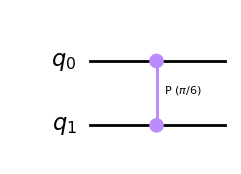

(0.91666667, -0.0, 0.0)
[0.04166666666666667, 0.04166666666666667, -0.04166666666666663, -0.04166666666666663]


In [44]:
qc = qc.decompose().decompose()
from monodromy.coverage import convert_gate_to_monodromy_coordinate

qc = QuantumCircuit(2)
qc.cp(np.pi / 6, 0, 1)
display(qc.draw("mpl", fold=-1))
from weylchamber import c1c2c3
from qiskit.quantum_info import Operator

print(c1c2c3(Operator(qc).data))
t_c = convert_gate_to_monodromy_coordinate(Operator(qc))
print(t_c)

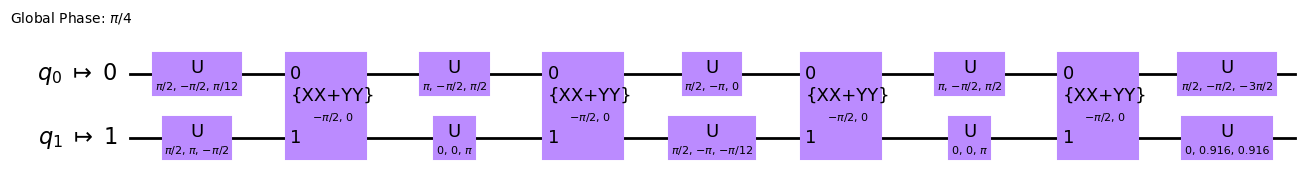

(0.91666667, -0.0, 0.0)
[0.45833333333333337, 0.45833333333333337, -0.45833333333333337, -0.45833333333333337]


In [45]:
from qiskit import transpile

qc = transpile(
    qc, optimization_level=1, basis_gates=["xx_plus_yy", "u"], coupling_map=coupling_map
)
display(qc.draw("mpl"))
from qiskit.quantum_info import Operator

print(c1c2c3(Operator(qc).data))
t_c = convert_gate_to_monodromy_coordinate(Operator(qc))
print(t_c)
# np.allclose(t_c, [0.25, 0.25, 0.25, -0.75])

In [10]:
# from transpile_benchy.benchmark import Benchmark

# transpilers = [
#     SabreMS(coupling_map, use_fast_settings=False, name="SABREMS-Slow"), # parallel=True,
#     SabreMS(coupling_map, use_fast_settings=True, name="SABREMS-Fast"), # parallel=False,
#     # QiskitLevel3(coupling_map),
# ]
# metrics = [DepthMetric(), TotalMetric(), TimeMetric()]

# benchmark = Benchmark(
#     transpilers=transpilers,
#     submodules=qiskit_functions_qft,
#     metrics=metrics, #only interested in TimeMetric, is there by default
#     num_runs=1,
# )
# benchmark.run()

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx
6.5
8.0


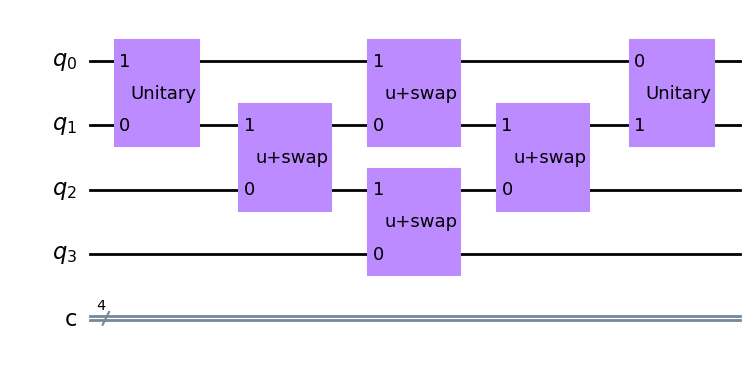

In [11]:
runner = SabreMS(
    coupling_map,
    cx_basis=0,
    # parallel=0,
    logger=transpile_benchy_logger,
    cost_function="depth",
    # cost_function="basic",
    # anneal_routing=True,
    # layout_trials=20,
    # fb_iters=4,
    # fixed_aggression=0
    # cost_function="basic",
)
runner.seed = 0
metric = DepthMetric(consolidate=False)
runner._append_metric_pass(metric)
metric = TotalMetric(consolidate=False)
runner._append_metric_pass(metric)
metric = TotalSwaps(consolidate=False)
runner._append_metric_pass(metric)
# metric = TimeMetric()
# runner._append_metric_pass(metric)
transp = runner.run(qc)
# print(runner.property_set["accepted_subs"])
print(runner.property_set["monodromy_depth"])
print(runner.property_set["monodromy_total"])
# display(runner.property_set['pre'].draw('mpl'))
display(runner.property_set["mid"].draw("mpl", fold=-1))
# display(runner.property_set["post0"].draw("mpl"))
# display(runner.property_set["post"].draw("mpl", fold=-1))
# display(transp.draw(output="mpl", fold=-1))

In [12]:
# %load_ext snakeviz
# import cProfile

# # Profile 'your_function' and write the result into 'my_profile.profile'
# cProfile.run("runner.run(qc)", "my_profile10.prof")
# # !snakeviz 'src/notebooks/my_profile.profile'

8.5
0


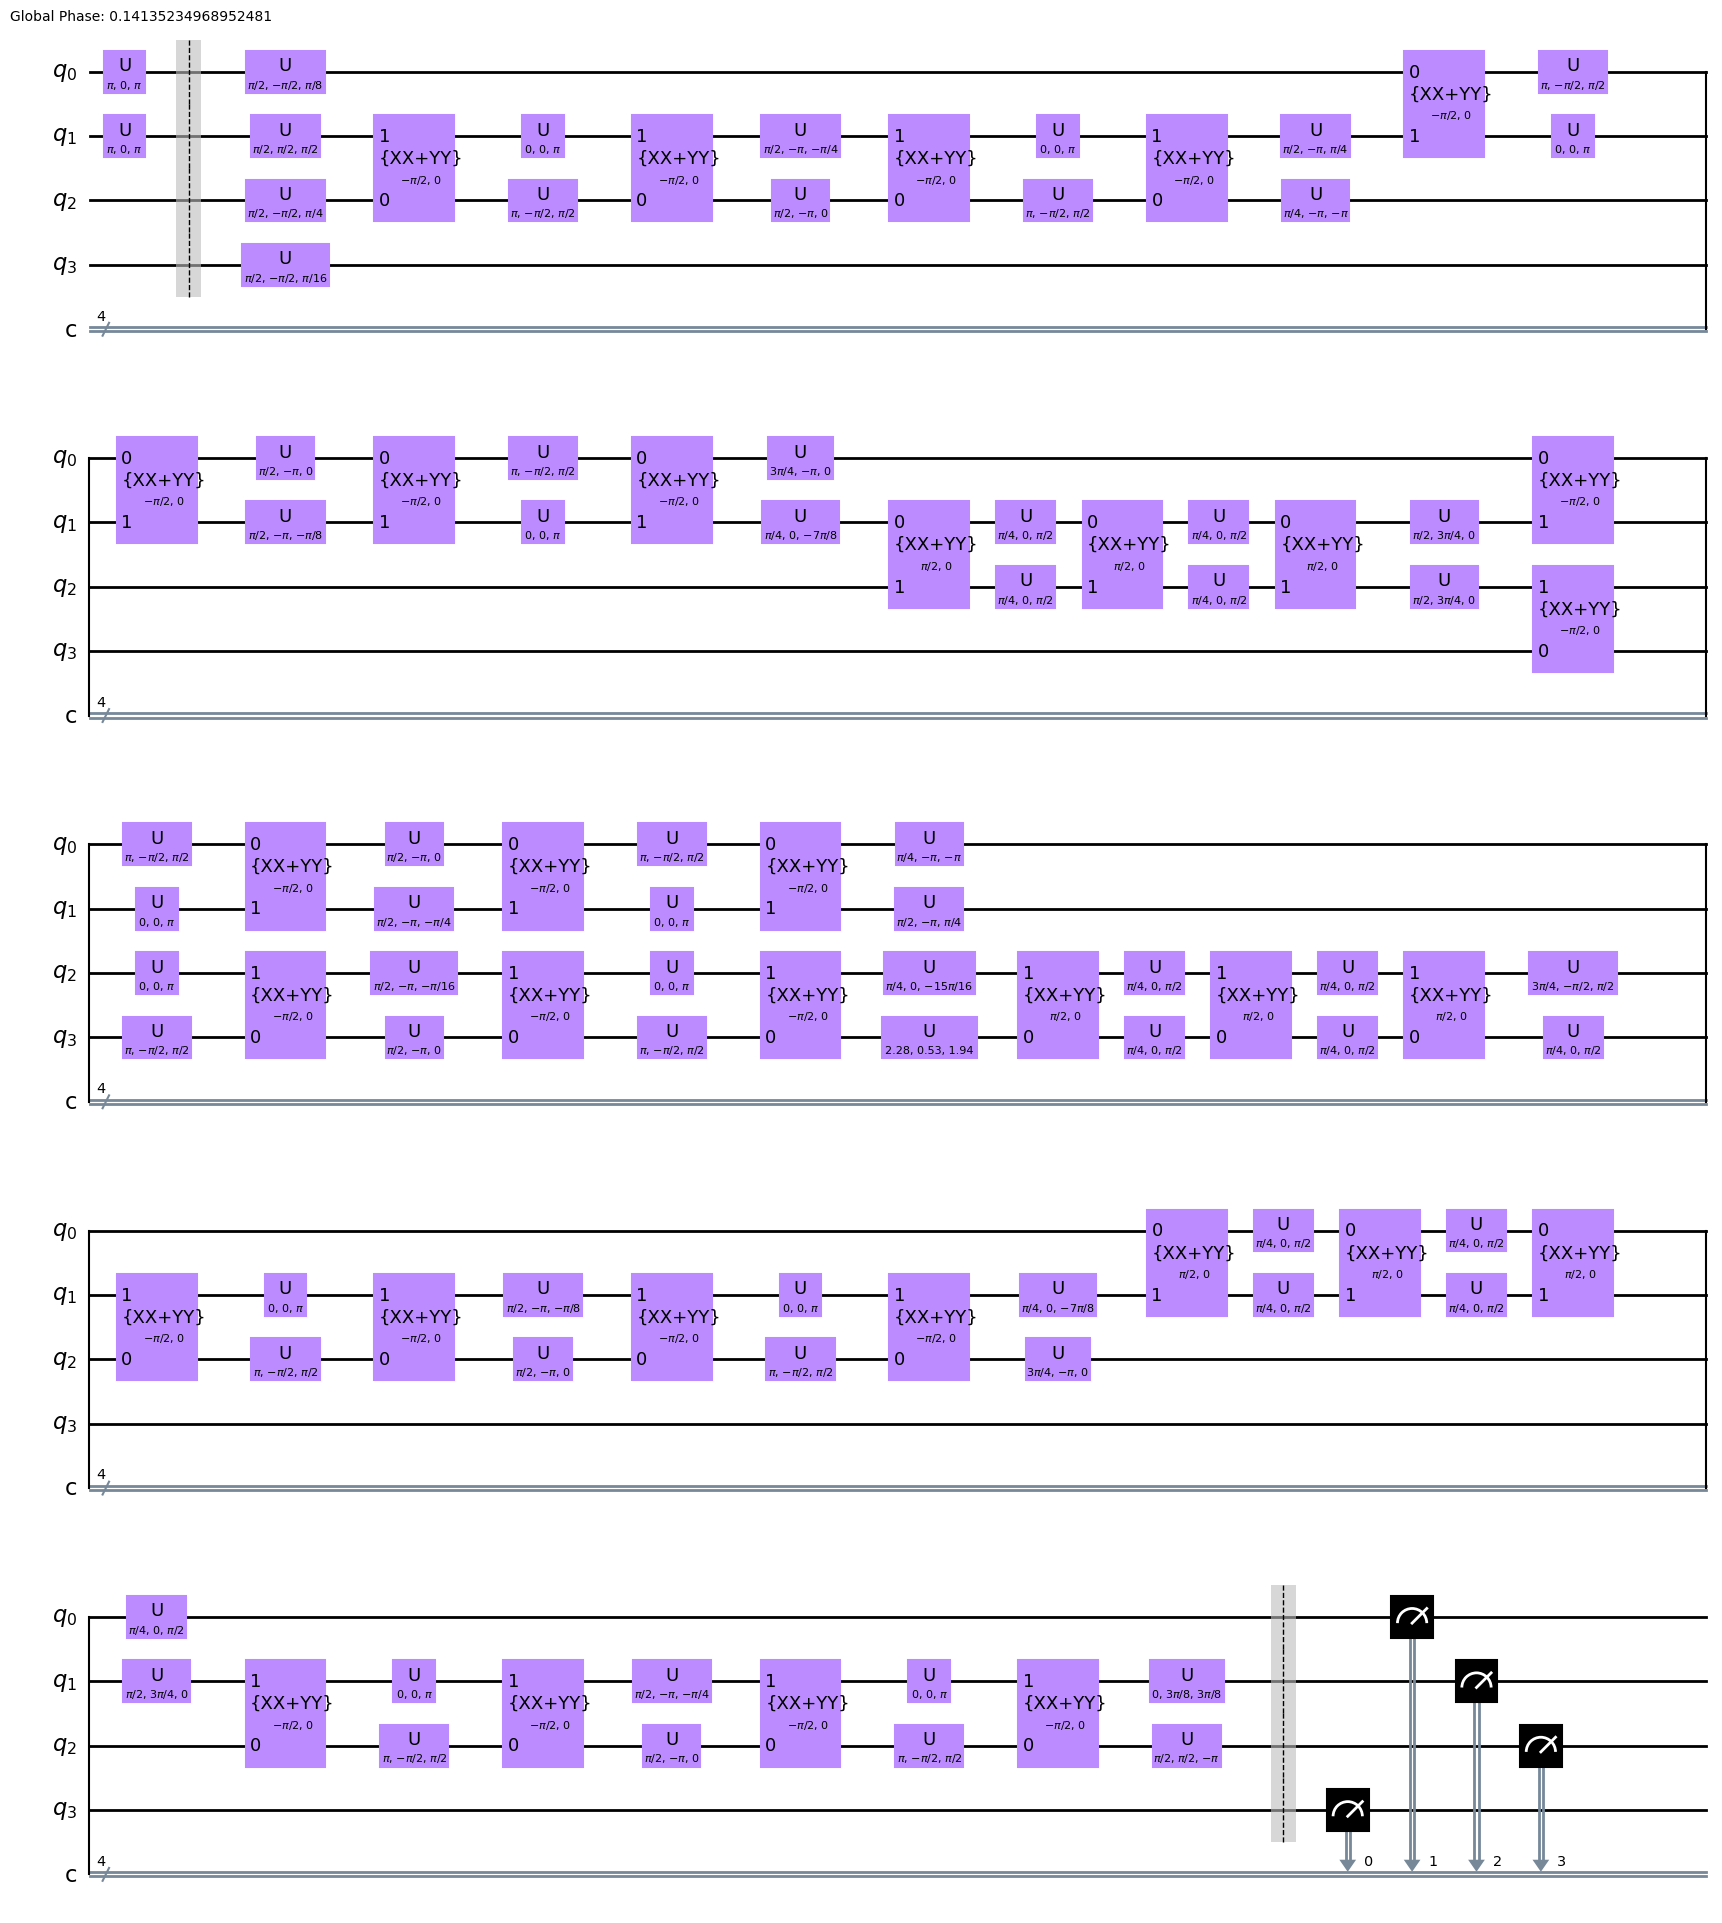

In [30]:
runner = QiskitLevel3(coupling_map, cx_basis=0)
metric = DepthMetric(consolidate=False)
runner._append_metric_pass(metric)
metric = TotalSwaps(consolidate=False)
runner._append_metric_pass(metric)
transp = runner.run(qc)
print(runner.property_set["monodromy_depth"])
print(runner.property_set["total_swaps"])
# print(runner.property_set["monodromy_total"])
# display(transp.draw(output="mpl", fold=-1))
display(runner.property_set["post0"].draw("mpl"))

In [14]:
# qc = QuantumCircuit(2)
# qc.u(np.pi / 2, 0.394, 0, 0)
# qc.u(0.841, np.pi / 2, 0, 1)
# qc.cx(0, 1)
# qc.u(np.pi, -2.97, 1.74, 0)
# qc.u(1.42, -1.01, 2.07, 1)
# qc.cx(0, 1)
# qc.u(np.pi / 2, -np.pi / 2, 3, 0)
# qc.u(2.58, -2.67, 3.04, 1)
# display(qc.draw("mpl"))
# ##
# pm = PassManager([Unroll3qOrMore(), FastConsolidateBlocks(coord_caching=True)])
# # pm = PassManager([Unroll3qOrMore(), Collect2qBlocks(), ConsolidateBlocks(force_consolidate=True)])
# cons_qc = pm.run(qc)
# cons_qc.draw("mpl", fold=-1)
# from weylchamber import c1c2c3

# [c1c2c3(instr.operation.to_matrix()) for instr in cons_qc]

In [15]:
# qc = QuantumCircuit(2)
# # qc.u(np.pi/2, 0.394, 0, 1)
# # qc.u(0,0,0, 1)
# qc.cx(0, 1)
# qc.u(np.pi, -2.97, 1.74, 0)
# qc.u(1.42, -1.01, 2.07, 1)
# qc.cx(0, 1)
# qc.u(0, 0, 0, 0)
# qc.u(2.58, -2.67, 3.04, 1)
# cons_qc = pm.run(qc)
# cons_qc.draw("mpl", fold=-1)
# from weylchamber import c1c2c3

# [c1c2c3(instr.operation.to_matrix()) for instr in cons_qc]